In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../scripts")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from SEIR import SEIR

In [4]:
plt.rcParams['figure.figsize'] = (14, 6)

In [5]:
current = pd.read_csv("../data/covidtracking/current.csv")

In [6]:
historic = pd.read_csv("../data/covidtracking/daily.csv")

In [7]:
date = historic.date.apply(str)
date_fix = date.str[:4] + "-" + date.str[4:6] + "-" + date.str[6:8]
date_fix = pd.to_datetime(date_fix)
historic.date = date_fix

In [8]:
historic = historic.set_index("date")

In [9]:
historic.columns

Index(['state', 'positive', 'negative', 'pending', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative',
       'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered',
       'dataQualityGrade', 'lastUpdateEt', 'hash', 'dateChecked', 'death',
       'hospitalized', 'total', 'totalTestResults', 'posNeg', 'fips',
       'deathIncrease', 'hospitalizedIncrease', 'negativeIncrease',
       'positiveIncrease', 'totalTestResultsIncrease'],
      dtype='object')

In [41]:
data_ny = historic.loc[historic.state == "NY", ["positive", "hospitalizedCurrently", "recovered", "death", "totalTestResults"]].copy()

In [42]:
data_ny["infectious"] = data_ny["positive"] - data_ny["recovered"] - data_ny["hospitalizedCurrently"]

In [43]:
data_ny = data_ny.drop(columns=["positive"])

In [44]:
data_ny = data_ny.rename(columns={"death":"dead", "hospitalizedCurrently":"hospitalized", "totalTestResults":"total_tests"})

In [45]:
data_ny = data_ny[["infectious", "recovered", "hospitalized", "dead", "total_tests"]]

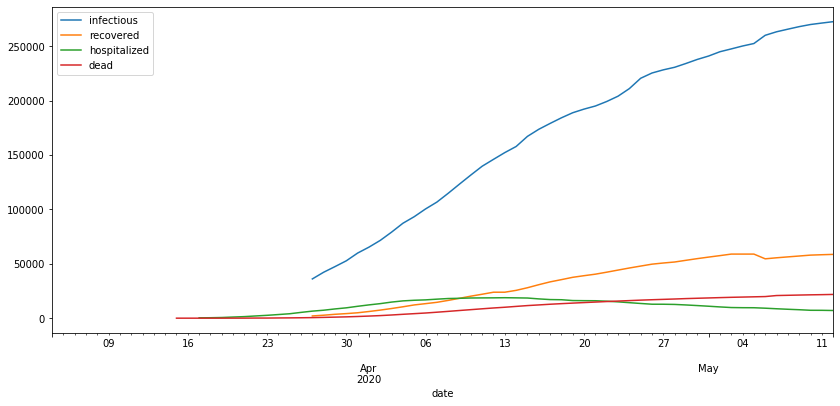

In [46]:
data_ny.drop(columns=["total_tests"]).plot(figsize=(14,6))

In [16]:
data_ny = data_ny.dropna()

In [17]:
data_ny = data_ny.sort_index(ascending=True).reset_index()

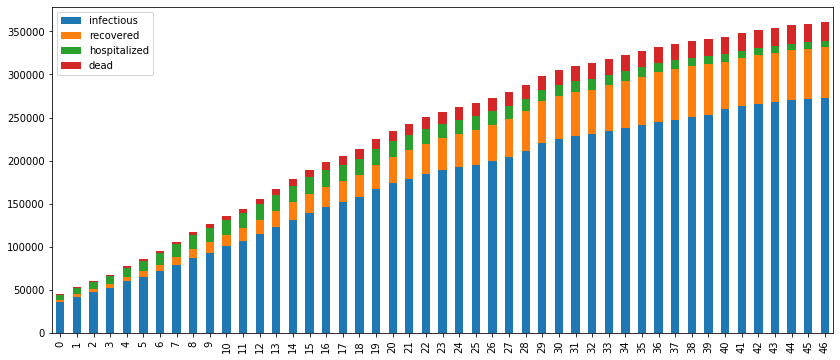

In [18]:
data_ny.drop(columns=["total_tests", "date"]).plot(kind="bar", stacked=True);

In [19]:
target = data_ny.drop(columns=["total_tests", "date"])

In [22]:
target.to_csv("../data/obs.csv", index=False)